Coordinate Transformation with pyproj
=====================

This note book reads in an XYZ data file and converts the coordinate system using the pyproj library

Requirements
--------------

pip install pyproj



Written by: Dom F.
Created: May 4th, 2018

In [1]:
import pyproj
import numpy as np
%pylab inline

workDir = ".\\"

Populating the interactive namespace from numpy and matplotlib


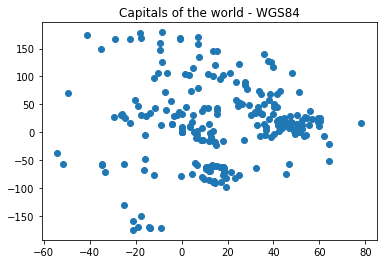

In [2]:
# Read in the xyz_data file in column format
xydata = np.loadtxt(workDir + "country-capitals.csv", delimiter=",")

# Plot it
plt.figure()
plt.scatter(xydata[:,0],xydata[:,1])
plt.title('Capitals of the world - WGS84')


In [4]:
# Specify the coordinate systems
systemIn = pyproj.Proj("+init=EPSG:4326") # Code for WGS84 Lat-Lon
systemOut = pyproj.Proj("+init=EPSG:26907") # UTM NAD83 zone 7N

# Convert the x,y locations
xOut, yOut = pyproj.transform(systemIn, systemOut, xydata[:,0], xydata[:,1])

# Swap the x,y coordinates
xyDataOut = np.c_[xOut, yOut, xydata[:,2:]]

# Export to a new file
np.savetxt(workDir + "datafileOut.xyz", xyDataOut, fmt='%.8e', delimiter='\t')

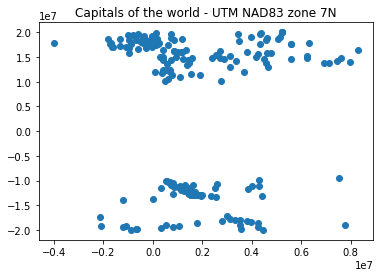

In [6]:
# Plot new coord
plt.figure()
plt.scatter(xyDataOut[:,0], xyDataOut[:,1])
plt.title('Capitals of the world - UTM NAD83 zone 7N')